In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read Data

In [196]:
df = pd.read_csv("/content/drive/MyDrive/ML/Hackathon/archive/heart.csv")
df.head()
df.shape

(1025, 14)

In [197]:
df.shape

(1025, 14)

In [198]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##Data Analysis 




#### Age vs Target Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age vs Target')

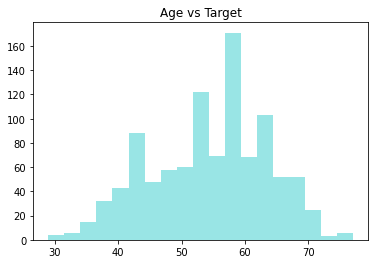

In [199]:
sns.distplot(df, x=df['age'], kde=False, color = "c")
plt.title('Age vs Target')

#### Cholesterol vs Target Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cholesterol of Heart Diseased Patients\n')

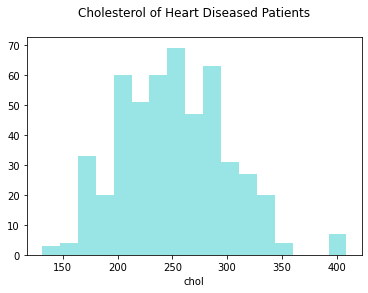

In [200]:
sns.distplot(df[df['target']==0]['chol'],kde=False, color = 'c')
plt.title('Cholesterol of Heart Diseased Patients\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Max Heart Rate Achieved of Heart Diseased Patients\n')

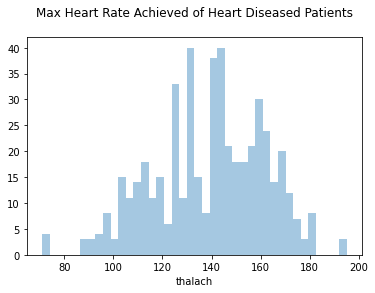

In [201]:
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)
plt.title('Max Heart Rate Achieved of Heart Diseased Patients\n')

####Changing column names to make it easier to interpret later

In [202]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

#### Creating categorical column values


In [203]:
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'

#### One-Hot encoding

In [205]:
dt = pd.get_dummies(df, drop_first=False)
dt.columns
df_temp = dt['thalassemia_type_fixed defect']
dt = pd.get_dummies(df, drop_first=True)

frames = [dt, df_temp]
finalData = pd.concat(frames,axis=1)
finalData.drop('thalassemia_type_nothing',axis=1,inplace=True)
finalCopy = finalData.copy()
finalData.head()


,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,52,1,125,212,0,168,0,1.0,2,0,0,0,0,0,1,0,1,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,1,0,0,0,0,1,0
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,0,1,0,0,0,1,0
3,61,1,148,203,0,161,0,0.0,1,0,0,0,0,0,1,0,1,0,1,0
4,62,0,138,294,1,106,0,1.9,3,0,0,0,0,0,1,1,0,1,0,0


## Gathering the columns

In [206]:
X = finalData.drop('target', axis = 1)
y = finalData['target']

## Split data into training and testing data

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Apply Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()
LR_clf.fit(X_train,y_train)

In [209]:
LR_pred = LR_clf.predict(X_test)

In [210]:
from sklearn.metrics import accuracy_score
LR_accuracy = accuracy_score(y_test,LR_pred)*100
print(LR_accuracy)

85.36585365853658


## Apply Random Forest Classifier 

In [211]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(max_depth=3, random_state=0)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [212]:
RF_pred = RF_clf.predict(X_test)

In [213]:
RF_accuracy = accuracy_score(y_test,RF_pred)*100
print(RF_accuracy)

88.29268292682927


## Plotting and Comparing the Accuracy Scores of the Classifiers

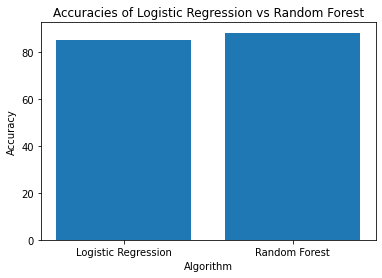

In [214]:
x = ['Logistic Regression', 'Random Forest']
y = [LR_accuracy, RF_accuracy]
plt.bar(x,y)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracies of Logistic Regression vs Random Forest')
plt.show()

## Plotting and Comparing F1 Scores of Classifiers


In [224]:
from sklearn.metrics import f1_score
LR_f1 = f1_score(y_test, LR_pred, average='binary')*100
RF_f1 = f1_score(y_test, RF_pred, average='binary')*100
print(LR_f1, RF_f1)

86.60714285714286 88.88888888888889


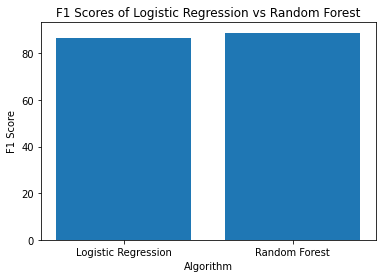

In [226]:
x = ['Logistic Regression', 'Random Forest']
y = [LR_f1, RF_f1]
plt.bar(x,y)
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Logistic Regression vs Random Forest')
plt.show()

## Plotting Confusion Matrices

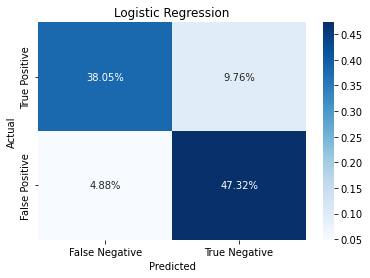

In [215]:
from sklearn.metrics import confusion_matrix
LR_confusion_matrix = confusion_matrix(y_test, LR_pred)
ax = sns.heatmap(LR_confusion_matrix/np.sum(LR_confusion_matrix),fmt='.2%', annot=True, cmap='Blues')

ax.set_title('Logistic Regression');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['False Negative','True Negative'])
ax.yaxis.set_ticklabels(['True Positive','False Positive' ])
plt.show()


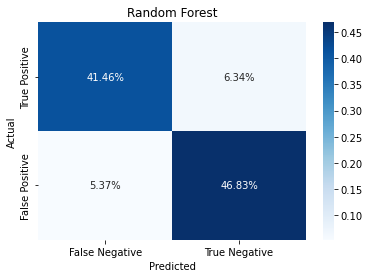

In [216]:
RF_confusion_matrix = confusion_matrix(y_test, RF_pred)
ax = sns.heatmap(RF_confusion_matrix/np.sum(RF_confusion_matrix),fmt='.2%', annot=True, cmap='Blues')

ax.set_title('Random Forest');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels(['False Negative','True Negative'])
ax.yaxis.set_ticklabels(['True Positive','False Positive' ])
plt.show()
